In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import division
from __future__ import print_function
from __future__ import absolute_import
from __future__ import unicode_literals  

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, norm
import os.path

import IPython

num_seeds = 41
test_idx=6558
sel_points = [1173,4644,1891,4936,1735,3562]
try_iters = [99,140,80,30,10,1]#[100,140,80,30,10,1]
colors = ['xkcd:pink','xkcd:purple','xkcd:magenta','xkcd:salmon','xkcd:lilac','xkcd:rose']

sns.set(color_codes=True)

def ceil_divide(numer,denom):
    return (numer-1)//denom+1

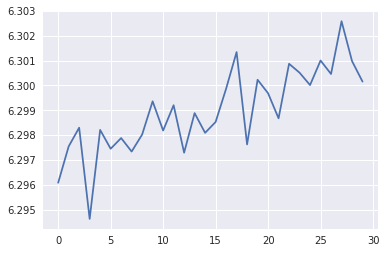

In [2]:
predicted_loss_diffs = [None] * num_seeds
for seed in range(num_seeds):
    f = np.load('../../scr/output-pre-june-1/mnist_small_all_cnn_c_hidden2_seed{}_wd1_damping2_iter-300000_predicted_loss_diffs-test-{}.npz'.format(seed, [test_idx]))
    predicted_loss_diffs[seed] = f['predicted_loss_diffs']

f = np.load('../../scr/output/more_retraining_losses.npz')
more_retraining_losses = f['losses']
more_retraining_losses[0] = 6.29608202
plt.plot(more_retraining_losses)

In [3]:
def plot_tracked_losses(seed,point):
    #oldpathname = '../../scr/output/seed{}_remove{}_losses.npz'.format(seed,point)
    #if os.path.exists(oldpathname+'bal'):
    #    f = np.load(oldpathname)
    #    losses = f['losses']
    #    losses_removed = f['losses_removed']
    #    losses_fine = f['losses_fine']
    #    losses_removed_fine = f['losses_removed_fine']
    #else:
    f = np.load('../../scr/output/seed{}_losses.npz'.format(seed))
    losses = f['losses']
    losses_fine = f['losses_fine']
    f = np.load('../../scr/output/seed{}_remove{}_only_losses.npz'.format(seed,point))
    losses_removed = f['losses_removed']
    losses_removed_fine = f['losses_removed_fine']
    diffs = np.subtract(losses_removed,losses)
    diffs_fine = np.subtract(losses_removed_fine,losses_fine)
    
    
# lukewarm losses along the way at
# '../../scr/output/mnist_small_all_cnn_c_hidden2_seed0-iter-100000_remove1173_retrain_losses'
# and similarly for 4644, 1891, 4936, 1735, 3562

    sns.set_style('white')
    fontsize=16
    fig, axs = plt.subplots(2, 2, sharex=False, sharey=False, figsize=(8, 8))
    plt.subplots_adjust(wspace=0.4)
    plt.suptitle('Seed {} Remove {}: {}'.format(seed, point,predicted_loss_diffs[seed][point]))

    extras = []
    retrain_losses = []
    for num_iters in try_iters:
        retrain_pathname = '../../scr/output/mnist_small_all_cnn_c_hidden2_seed{}_iter-{}000_remove{}_retrain_losses.npz'.format(seed,num_iters,point)
        extra = (seed == 0 and point in sel_points and os.path.exists(retrain_pathname))
        extras.append(extra)
        if extra:
            f = np.load(retrain_pathname)
            retrain_losses.append(f['retrain_losses'])
        else:
            retrain_losses.append([])
    
    axs[0][0].plot(range(300),losses)
    axs[0][0].plot(range(300),losses_removed)
    for i, num_iters in enumerate(try_iters):
        if extras[i]:
            axs[0][0].plot(range(num_iters,300),retrain_losses[i],color=colors[i])
    axs[0][0].set_xlabel('Thousands of steps')
    axs[0][0].set_ylabel('Loss on test pt')

    axs[0][1].scatter(range(300),diffs,alpha=0.5)
    for i, num_iters in enumerate(try_iters):
        if extras[i]:
            axs[0][1].scatter(range(num_iters,300),np.subtract(retrain_losses[i],losses[num_iters:]),alpha=0.2,color=colors[i])
    #if extra_old:
    #    axs[0][1].scatter(range(55,110),np.subtract(losses[55:110],losses[110]),alpha=0.5,color='xkcd:purple')
    #    axs[0][1].scatter(range(100,300),np.subtract(retrain_old,losses[100:]),alpha=0.5,color='xkcd:pink')
    axs[0][1].set_xlabel('Thousands of steps')
    axs[0][1].set_ylabel('Diff in loss')
    axs[0][1].hlines(0,-1,301,color='k',alpha=0.5,zorder=1)
    axs[0][1].plot(range(300), np.poly1d(np.polyfit(range(300), diffs, 1))(range(300)),color='r')

    axs[1][0].plot(range(100),losses_fine)
    axs[1][0].plot(range(100),losses_removed_fine)
    axs[1][0].set_xlabel('Steps')
    axs[1][0].set_ylabel('Loss on test pt')

    axs[1][1].scatter(range(100),diffs_fine,alpha=0.5)
    axs[1][1].set_xlabel('Steps')
    axs[1][1].set_ylabel('Diff in loss')
    axs[1][1].hlines(0,-1,101,color='k',alpha=0.5,zorder=1)
    axs[1][1].plot(range(100), np.poly1d(np.polyfit(range(100), diffs_fine, 1))(range(100)),color='r')
    
    print("Orig {}, removed {}".format(losses[299],losses_removed[299]))
    print("Actual: {}".format(losses_removed[299]-losses[299]))
    print("Pred: {}".format(predicted_loss_diffs[seed][point]))

Orig 2.13695788383, removed 2.22353577614
Actual: 0.0865778923035
Pred: 0.0344239751642
Orig 2.93186688423, removed 2.90477752686
Actual: -0.0270893573761
Pred: 0.000449924815785
Orig 1.49701046944, removed 1.49854493141
Actual: 0.0015344619751
Pred: 0.00254584156383


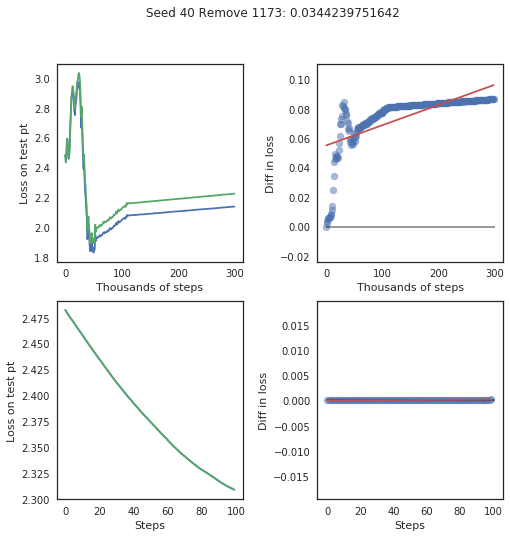

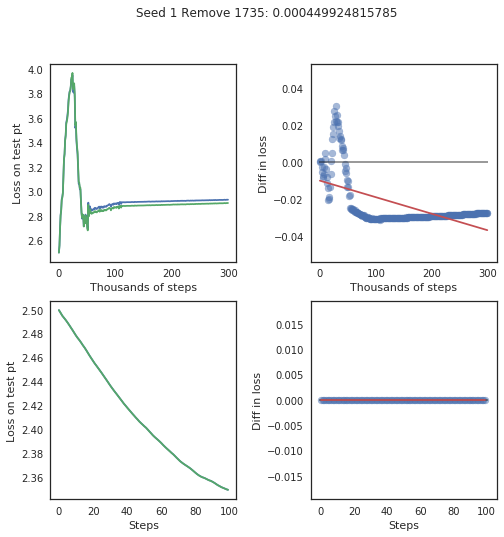

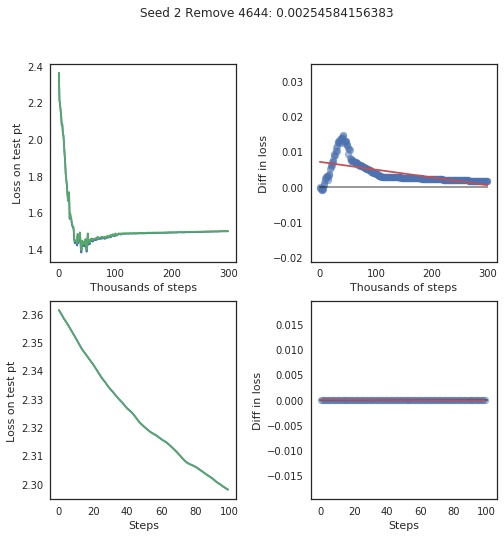

In [4]:
plot_tracked_losses(40,1173)
plot_tracked_losses(1,1735)
plot_tracked_losses(2,4644)

Orig 6.29831409454, removed 6.92093992233
Actual: 0.622625827789
Pred: 0.0464328724254
Orig 6.29831409454, removed 6.25440502167
Actual: -0.043909072876
Pred: 0.037021722967
Orig 6.29831409454, removed 6.15264034271
Actual: -0.145673751831
Pred: -0.0156040205522
Orig 6.29831409454, removed 6.14578437805
Actual: -0.152529716492
Pred: -0.0180690682151
Orig 6.29831409454, removed 6.03168821335
Actual: -0.266625881195
Pred: -0.0155574354692
Orig 6.29831409454, removed 6.2261300087
Actual: -0.0721840858459
Pred: 0.0103865939054


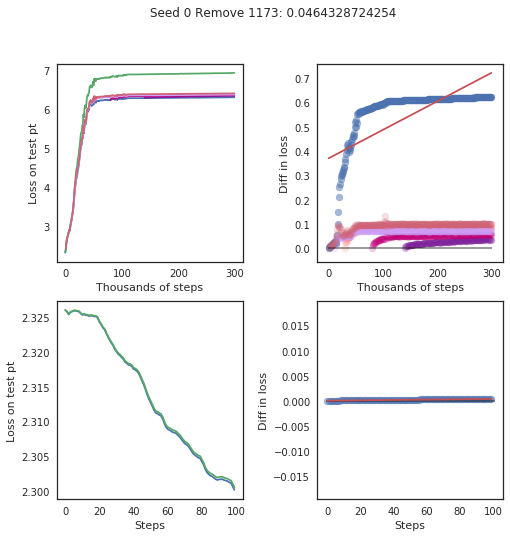

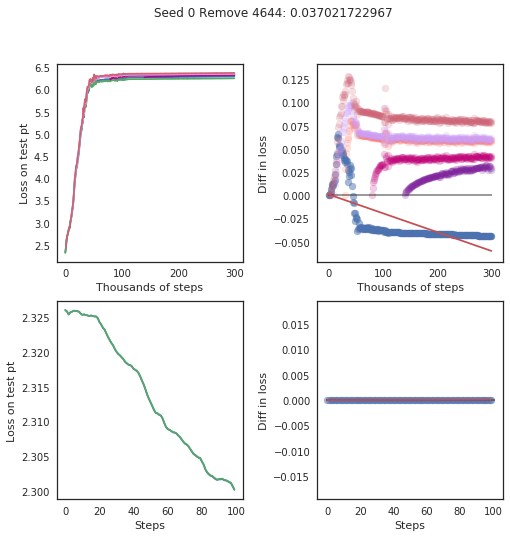

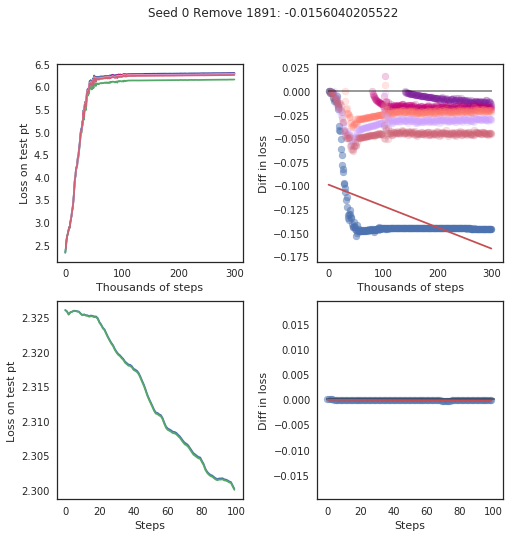

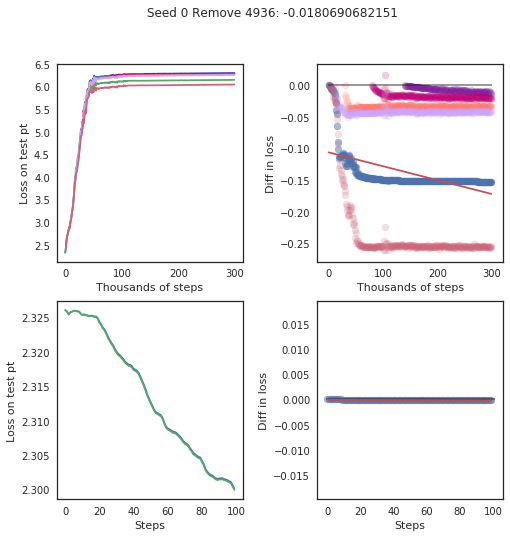

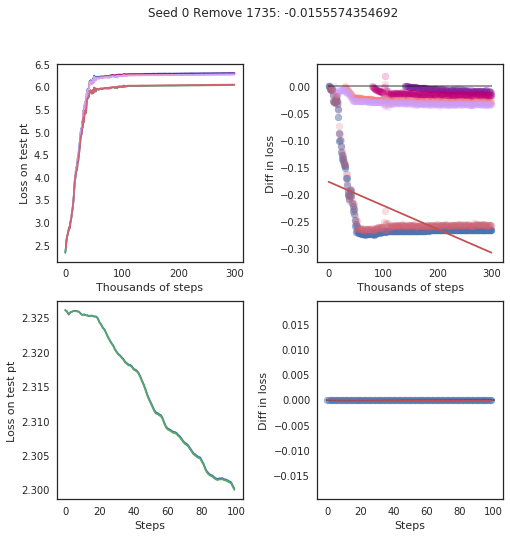

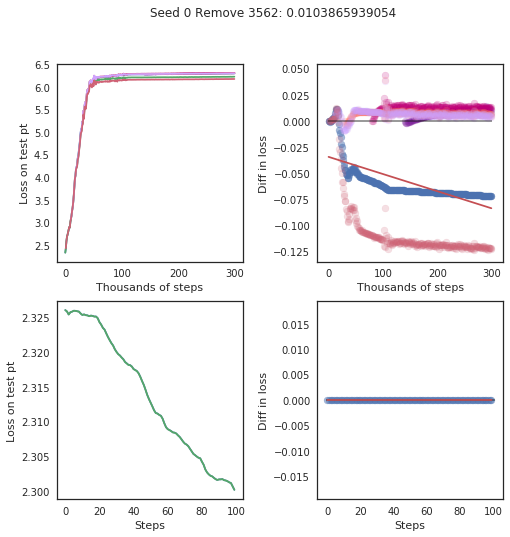

In [5]:
plot_tracked_losses(0,1173)
plot_tracked_losses(0,4644)
plot_tracked_losses(0,1891)
plot_tracked_losses(0,4936)
plot_tracked_losses(0,1735)
plot_tracked_losses(0,3562)